In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2025-12-12 10:48:38.578764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765536518.868808     135 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765536518.955021     135 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

**Dataset 01 Link** -   https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification?select=dataset


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


base_path = "/kaggle/input/asian-vs-african-elephant-image-classification/dataset"


train_path = os.path.join(base_path, "train")
test_path  = os.path.join(base_path, "test")


classes = ["African", "Asian"]

def load_and_preprocess_data(data_dir, classes, target_shape=(224, 224)):
    data = []
    labels = []

    for label, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)

        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                file_path = os.path.join(class_dir, filename)

                img = load_img(file_path, target_size=target_shape)
                img_array = img_to_array(img) / 255.0

                data.append(img_array)
                labels.append(label)

    return np.array(data, dtype="float32"), np.array(labels, dtype="int32")


X_train, y_train = load_and_preprocess_data(train_path, classes)
X_test, y_test   = load_and_preprocess_data(test_path, classes)


print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (840, 224, 224, 3) (840,)
Test shape: (188, 224, 224, 3) (188,)


In [ ]:
input_shape = (224, 224, 3)

input_layer = Input(shape=input_shape)


x = Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)


x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)


x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)


x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)


x = Flatten()(x)


x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)  # len(classes) = number of classes


model = Model(inputs=input_layer, outputs=output_layer)


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,31

 Total params: 139,578,434 (532.45 MB)

 Trainable params: 139,578,434 (532.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_test, y_test)
)


test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')


model.save('image_classification_model.h5')


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1008s 19s/step - accuracy: 0.4999 - loss: 0.7544 - val_accuracy: 0.4840 - val_loss: 0.6933
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1001s 19s/step - accuracy: 0.5030 - loss: 0.6933 - val_accuracy: 0.4840 - val_loss: 0.6934
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 975s 18s/step - accuracy: 0.5167 - loss: 0.6930 - val_accuracy: 0.4840 - val_loss: 0.6932
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 980s 19s/step - accuracy: 0.4784 - loss: 0.6932 - val_accuracy: 0.4840 - val_loss: 0.6931
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 981s 19s/step - accuracy: 0.4959 - loss: 0.6932 - val_accuracy: 0.4840 - val_loss: 0.6932


Test accuracy: 0.48404255509376526


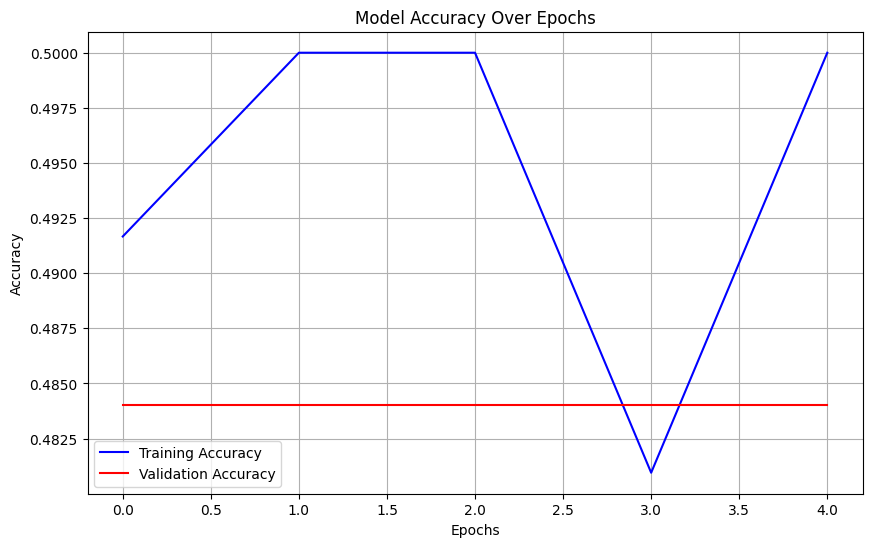

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Discussion
* In VGG-19, convolution layers learn important features from the image like edges and shapes. ReLU layers help the model learn faster by adding non-linearity. Pooling layers reduce image size while keeping important information. Fully connected layers use these features to make the final classification.

* VGG-19 uses small 3×3 filters because they can capture fine details in the image and, when stacked together, they can understand larger patterns while using fewer parameters and giving better accuracy.

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = '/kaggle/input/skin-cancer-mnist-ham10000/'
IMAGE_DIRS = ['HAM10000_images_part_1', 'HAM10000_images_part_2']


VGG16_WEIGHTS = '/kaggle/input/models/keras/default/1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
RESNET50_WEIGHTS = '/kaggle/input/models/keras/default/1/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
INCEPTIONV3_WEIGHTS = '/kaggle/input/models/keras/default/1/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [ ]:
metadata = pd.read_csv(os.path.join(DATA_DIR, 'HAM10000_metadata.csv'))
metadata['label'] = metadata['dx'].astype(str)
metadata['image_id'] = metadata['image_id'] + '.jpg'


train_df, temp_df = train_test_split(metadata, test_size=0.3, stratify=metadata['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 34

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


def create_generator(df, image_dirs, datagen, shuffle=False):
    df['full_path'] = df['image_id'].apply(
        lambda x: next((os.path.join(DATA_DIR, d, x) for d in image_dirs if os.path.exists(os.path.join(DATA_DIR, d, x))), None)
    )
    df = df[df['full_path'].notnull()].reset_index(drop=True)
    generator = datagen.flow_from_dataframe(
        dataframe=df,
        x_col='full_path',
        y_col='label',
        target_size=IMG_SIZE,
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=shuffle
    )
    return generator

train_generator = create_generator(train_df, IMAGE_DIRS, train_datagen, shuffle=True)
val_generator = create_generator(val_df, IMAGE_DIRS, val_test_datagen, shuffle=False)
test_generator = create_generator(test_df, IMAGE_DIRS, val_test_datagen, shuffle=False)

Found 7010 validated image filenames belonging to 7 classes.
Found 1502 validated image filenames belonging to 7 classes.
Found 1503 validated image filenames belonging to 7 classes.


In [ ]:
def build_pretrained_model(base_model_name, weights_path, input_shape=(224,224,3), num_classes=7):
    if base_model_name == 'VGG16':
        base_model = VGG16(weights=weights_path, include_top=False, input_shape=input_shape)
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights=weights_path, include_top=False, input_shape=input_shape)
    elif base_model_name == 'InceptionV3':
        base_model = InceptionV3(weights=weights_path, include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Unsupported model")

    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
EPOCHS = 5

vgg16_model = build_pretrained_model('VGG16', VGG16_WEIGHTS)
resnet_model = build_pretrained_model('ResNet50', RESNET50_WEIGHTS)
inception_model = build_pretrained_model('InceptionV3', INCEPTIONV3_WEIGHTS)

print("Training VGG16...")
vgg16_history = vgg16_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

print("Training ResNet50...")
resnet_history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

print("Training InceptionV3...")
inception_history = inception_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)


Training VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1586s 8s/step - accuracy: 0.4515 - loss: 1.6289 - val_accuracy: 0.6698 - val_loss: 1.0747
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1649s 8s/step - accuracy: 0.6652 - loss: 1.1314 - val_accuracy: 0.6738 - val_loss: 1.0114
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1573s 8s/step - accuracy: 0.6707 - loss: 1.0512 - val_accuracy: 0.6784 - val_loss: 0.9783
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1605s 8s/step - accuracy: 0.6759 - loss: 1.0219 - val_accuracy: 0.6844 - val_loss: 0.9604
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1653s 8s/step - accuracy: 0.6839 - loss: 0.9783 - val_accuracy: 0.6871 - val_loss: 0.9492
Training ResNet50...
Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.5347 - loss: 1.5250 - val_accuracy: 0.6698 - val_loss: 1.1293
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.6636 - loss: 1.1873 - val_accuracy: 0.6698 - val_loss: 1.1277
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.6733 - loss:

In [ ]:
def evaluate_model(model, generator, class_names):
    preds = model.predict(generator)
    y_pred = np.argmax(preds, axis=1)
    y_true = generator.classes
    print(classification_report(y_true, y_pred, target_names=class_names))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

class_names = list(train_generator.class_indices.keys())

print("==== VGG16 Evaluation ====")
evaluate_model(vgg16_model, test_generator, class_names)

print("==== ResNet50 Evaluation ====")
evaluate_model(resnet_model, test_generator, class_names)

print("==== InceptionV3 Evaluation ====")
evaluate_model(inception_model, test_generator, class_names)

==== VGG16 Evaluation ====
45/45 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        49
         bcc       0.00      0.00      0.00        77
         bkl       0.26      0.13      0.18       165
          df       0.00      0.00      0.00        17
         mel       0.41      0.20      0.27       167
          nv       0.73      0.97      0.83      1006
        vasc       0.00      0.00      0.00        22

    accuracy                           0.69      1503
   macro avg       0.20      0.19      0.18      1503
weighted avg       0.56      0.69      0.61      1503

Confusion Matrix:
 [[  0   0  18   0   2  29   0]
 [  0   0   8   0   6  63   0]
 [  0   0  22   0  20 123   0]
 [  0   0   4   0   0  13   0]
 [  0   0  22   0  34 111   0]
 [  0   0  11   0  20 975   0]
 [  0   0   1   0   1  20   0]]
==== ResNet50 Evaluation ====
45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step
              precision    recall  f1-score   support

       akiec       0.33      0.06      0.10        49
         bcc       0.36      0.18      0.24        77
         bkl       0.44      0.37      0.40       165
          df       0.00      0.00      0.00        17
         mel       0.58      0.18      0.27       167
          nv       0.78      0.97      0.86      1006
        vasc       0.33      0.05      0.08        22

    accuracy                           0.72      1503
   macro avg       0.40      0.26      0.28      1503
weighted avg       0.67      0.72      0.67      1503

Confusion Matrix:
 [[  3   9  23   0   0  14   0]
 [  2  14  11   0   7  43   0]
 [  2   4  61   0  10  88   0]
 [  0   1   4   0   1  11   0]
 [  2   3  22   0  30 110   0]
 [  0   7  15   0   4 978   2]
 [  0   1   3   0   0  17   1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


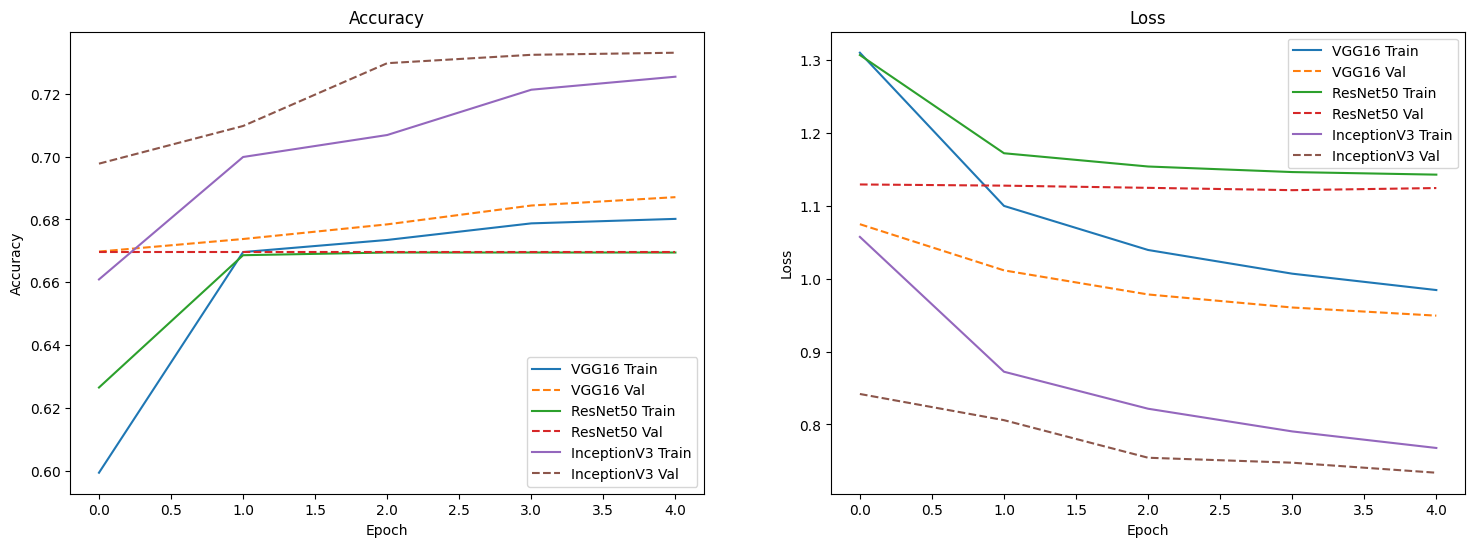

In [ ]:
def plot_history(histories, model_names):
    plt.figure(figsize=(18,6))

    plt.subplot(1,2,1)
    for h, name in zip(histories, model_names):
        plt.plot(h.history['accuracy'], label=f'{name} Train')
        plt.plot(h.history['val_accuracy'], '--', label=f'{name} Val')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    for h, name in zip(histories, model_names):
        plt.plot(h.history['loss'], label=f'{name} Train')
        plt.plot(h.history['val_loss'], '--', label=f'{name} Val')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history([vgg16_history, resnet_history, inception_history], ['VGG16', 'ResNet50', 'InceptionV3'])

Inception V3 performs best on the HAM10000 skin cancer dataset because its multi-scale convolutional blocks capture both fine lesion textures and larger structural patterns, which are crucial for distinguishing skin lesion types. Additionally, its deep yet efficient architecture reduces overfitting on medical images while leveraging pretrained ImageNet features for better generalization.